In [0]:
# import pandas as pd
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# df = pd.read_csv(url)
# countries = list(set(df[df.columns[1]]))
# print(countries)

['Egypt', 'Philippines', 'Senegal', 'Montenegro', 'Slovenia', 'Bolivia', 'Hungary', 'Andorra', 'Kazakhstan', 'Mali', 'Guyana', 'Switzerland', 'Serbia', 'Romania', 'Jordan', 'Guatemala', 'Congo (Kinshasa)', 'Lebanon', 'Italy', 'Tanzania', 'Israel', 'Dominica', 'Liechtenstein', 'Togo', 'China', 'Libya', 'Mexico', 'India', 'Belgium', 'Morocco', 'Slovakia', 'Paraguay', 'Antigua and Barbuda', 'Sao Tome and Principe', 'Greece', 'Brazil', 'Iran', 'Chile', 'MS Zaandam', 'Costa Rica', 'Liberia', 'Honduras', 'Indonesia', 'United Kingdom', 'Saint Kitts and Nevis', 'Haiti', 'Japan', 'Kyrgyzstan', 'Latvia', 'Angola', 'Panama', 'Oman', 'Congo (Brazzaville)', 'Denmark', 'Saint Vincent and the Grenadines', 'Gabon', 'Cuba', 'Laos', 'Papua New Guinea', 'Maldives', 'Nepal', 'Tunisia', 'Djibouti', 'France', 'Benin', 'Syria', 'Zambia', 'Canada', 'Moldova', 'Malta', 'Estonia', 'Zimbabwe', 'West Bank and Gaza', 'Iraq', 'Turkey', 'Grenada', 'Guinea-Bissau', 'Colombia', 'Lithuania', 'Namibia', 'Nigeria', 'Ukra

**Choosing Countries** <br>
A total of 25 countires have been choosen. 


*   The first 10 countries are those with high new cases and the include Mexico, Brazil, Ukraine, India, USA, Panama, Hungary, Pakistan, Israel, Bulgaria. (Source : https://www.worldometers.info/coronavirus , retrieved on : April 24, 2020, information last updated on: retrieved on : April 24, 2020).

*  Next 10 countries are those with lowest new cases and they include Spain, Italy, France, Germany, UK, Turkey, Iran, Russia, Belgium, Canada.  (Source : https://www.worldometers.info/coronavirus , retrieved on : April 24, 2020, information last updated on retrieved on : April 24, 2020). 

*  Last 5 countries are those with GDP growth similar to Pakistan's. The include Korea, Australia, Norway, Nigeria, United Arab Emirates. (Source : http://statisticstimes.com/economy/projected-world-gdp-ranking.php , retrieved on : April 24, 2020, information last on 20 Feb 2020).
 



In [0]:
countries = ["Mexico", "Brazil", "Ukraine", "India", "USA", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             " Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates"]

In [0]:
from datetime import datetime, timedelta

date =  datetime.strptime('2020-01-22','%Y-%m-%d')
today_date = datetime.today()
diff = (today_date - date).days
count= 1

while(count!= diff):
  i_date = (date + timedelta(days=count)).strftime('%Y-%m-%d')
  count+=1
  print(i_date)

- variables including in from the api are  ["country","confirmed","deaths","recovered","confirmed_diff","deaths_diff","recovered_diff","active","active_diff","fatality_rate"]

- only including the cases are being available in the dataset.
- in place of date will input number of days since first case would be my variable.

In [0]:
import requests
import csv
import os.path
from datetime import datetime, timedelta

url = "https://covid-19-statistics.p.rapidapi.com/reports"
variables = ["country","date","confirmed","deaths","recovered","confirmed_diff","deaths_diff","recovered_diff","active","active_diff","fatality_rate"]

date =  datetime.strptime('2020-01-22','%Y-%m-%d')
today_date = datetime.today()
diff = (today_date - date).days
count= 0

with open("corona_global.csv", 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(variables)

  while(count!= diff):
    count+=1
    print(count)
    i_date = (date + timedelta(days=count)).strftime('%Y-%m-%d')
    for i in range(len(countries)):

      querystring = {"region_name":countries[i],"date":i_date}

      headers = {
          'x-rapidapi-host': "covid-19-statistics.p.rapidapi.com",
          'x-rapidapi-key': "5139f761cdmsh9dae448cf77f2fcp159a89jsn323fea496f96"
          }
      response = requests.request("GET", url, headers=headers, params=querystring)

      data = response.text
      if len(data) > 18:
        data = " ".join(data.split())[15:len(data)-9].split(' ')
        b = [countries[i],data[1][:len(data[1])-1],data[3][:len(data[3])-1],data[5][:len(data[5])-1],data[7][:len(data[7])-1],data[9][:len(data[9])-1],data[11][:len(data[11])-1],data[13][:len(data[13])-1],data[18][:len(data[18])-1],data[20][:len(data[20])-1],data[22][:len(data[22])-1]]
        writer.writerow(b)
      

    

In [0]:
url = "https://covid-19-statistics.p.rapidapi.com/reports"
querystring = {"region_name":"United Arab Emirates","date":"2020-04-20"}

headers = {
    'x-rapidapi-host': "covid-19-statistics.p.rapidapi.com",
    'x-rapidapi-key': "5139f761cdmsh9dae448cf77f2fcp159a89jsn323fea496f96"
    }
response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)


{
    "data": [
        {
            "date": "2020-04-20",
            "confirmed": 7265,
            "deaths": 43,
            "recovered": 1360,
            "confirmed_diff": 484,
            "deaths_diff": 2,
            "recovered_diff": 74,
            "last_update": "2020-04-20 23:36:27",
            "active": 5862,
            "active_diff": 408,
            "fatality_rate": 0.0059,
            "region": {
                "iso": "ARE",
                "name": "United Arab Emirates",
                "province": "",
                "lat": "23.4241",
                "long": "53.8478",
                "cities": []
            }
        }
    ]
}


In [0]:
#b = [a[a.index('date":')+1][1:len(a[a.index('date":')+1])-2], a[a.index('"confirmed":')+1]]
b = [a[1][:len(a[1])-1],a[3][:len(a[3])-1],a[5][:len(a[5])-1],a[7][:len(a[7])-1],a[9][:len(a[9])-1],a[11][:len(a[11])-1],a[13][:len(a[13])-1],a[18][:len(a[18])-1],a[20][:len(a[20])-1],a[22][:len(a[22])-1]]
print(b)
variables = ["country","confirmed","deaths","recovered","confirmed_diff","deaths_diff","recovered_diff","active","active_diff","fatality_rate"]
print(len(b),len(variables))

['"2020-04-22"', '10076', '212', '2156', '511', '11', '83', '7708', '417', '0.021']
10 10


In [0]:
gdp_data =  !wget -O gdp.csv 'http://databank.worldbank.org/data/download/GDP.csv'

In [0]:
import requests
import pandas as pd

countries_diff_format = ["Mexico", "Brazil", "Ukraine", "India", "United States", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             "Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates"]

gdpf = pd.read_csv('http://databank.worldbank.org/data/download/GDP.csv')


gdpf = gdpf.loc[:,gdpf.columns[[3,4]]]
gdpf.columns = ["Country",  "GDP"]
gdpf = gdpf.loc[gdpf['Country'].isin(countries_diff_format)]

print(gdpf)
gdpf.to_csv('gdp.csv')


                 Country           GDP
4          United States   20,544,343 
7                Germany    3,947,620 
9                 France    2,777,535 
10                 India    2,718,732 
11                 Italy    2,083,864 
12                Brazil    1,868,626 
13                Canada    1,713,342 
16             Australia    1,433,904 
17                 Spain    1,419,042 
18                Mexico    1,220,699 
22                Turkey      771,350 
26               Belgium      542,761 
31                Norway      434,167 
32  United Arab Emirates      414,179 
33               Nigeria      397,270 
35                Israel      370,588 
43              Pakistan      314,588 
59               Hungary      157,883 
61               Ukraine      130,832 
77              Bulgaria       65,133 
78                Panama       65,055 


# From this cell

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [134]:
countries_diff_format = ["Mexico", "Brazil", "Ukraine", "India", "United States", "Panama", "Hungary", "Pakistan", "Israel", "Bulgaria",
             "Spain", "Italy", "France", "Germany", "UK", "Turkey", "Iran", "Russia", "Belgium", "Canada",
             "Korea", "Australia", "Norway", "Nigeria", "United Arab Emirates"]
data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',parse_dates=['date'])
data = data.drop('new_cases', 1)
data = data.drop('total_deaths', 1)
data = data.drop('new_deaths', 1)
data = data.drop('total_cases_per_million', 1)
data = data.drop('new_cases_per_million', 1)
data = data.drop('total_deaths_per_million', 1)
data = data.drop('new_deaths_per_million', 1)
data = data.drop('iso_code', 1)
data = data.drop('total_tests',1)
data = data.drop('new_tests',1)
data = data.drop('new_tests_smoothed',1)
data = data.drop('total_tests_per_thousand',1)
data = data.drop('new_tests_per_thousand',1)
data = data.drop('new_tests_smoothed_per_thousand',1)
data = data.drop('tests_units',1)
data = data.loc[data['location'].isin(countries_diff_format)]
data = data.fillna(0)

#data['date'] =pd.to_datetime(data.date)
data = data.sort_values(by='date',ascending=True)

data['row_number'] = np.arange(len(data))


In [113]:
data.columns

Index(['location', 'date', 'total_cases', 'total_deaths', 'total_tests',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k',
       'row_number'],
      dtype='object')

In [135]:
for i in countries_diff_format:
  data[i] = 0

for i in countries_diff_format:
  data.loc[data['location'] == i, i] = 1

print(data.head())
data = data.drop('location',axis = 1)


                   location       date  total_cases  stringency_index  \
507    United Arab Emirates 2019-12-31            0               0.0   
15079              Pakistan 2019-12-31            0               0.0   
953               Australia 2019-12-31            0               0.0   
14479                Norway 2019-12-31            0               0.0   
14113               Nigeria 2019-12-31            0               0.0   

        population  population_density  median_age  aged_65_older  \
507      9890400.0             112.442        34.0          1.144   
15079  220892331.0             255.573        23.5          4.495   
953     25499881.0               3.202        37.9         15.504   
14479    5421242.0              14.462        39.7         16.821   
14113  206139587.0             209.588        18.1          2.751   

       aged_70_older  gdp_per_capita  ...  Turkey  Iran  Russia  Belgium  \
507            0.526       67293.483  ...       0     0       0       

In [136]:
df = data
df = df.drop('date',axis = 1)

#df.set_index(['row_number'])

In [137]:
pak_cases = data[data['Pakistan'] == 1] 

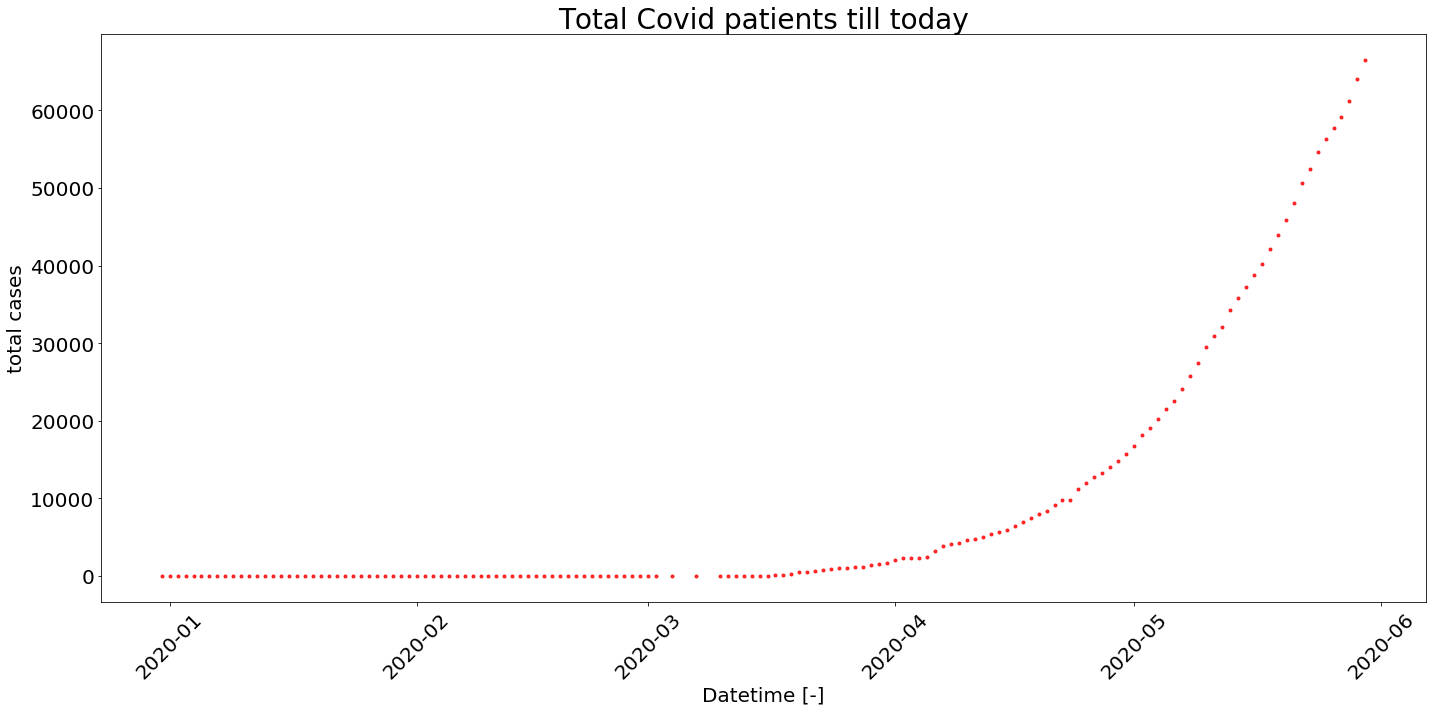

In [138]:
# Plotting the target: Total cases

plt.figure(figsize=(20,10))

plt.plot(pak_cases["date"], pak_cases['total_cases'], '.', color='red', label='Original data', alpha=0.8)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()

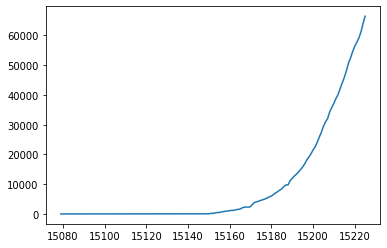

In [139]:
plt.plot(pak_cases['total_cases'])
plt.show()

In [140]:
X = df.drop(['total_cases'], axis=1)

y = df['total_cases']

train_size = 0.7

split_index = int(df.shape[0]*train_size) #index at which the datafram will be split

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

In [110]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Conv1D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from time import time
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [141]:
scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train)

X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

print((X_train.shape, y_train.shape))

print((X_test.shape, y_test.shape))

((2184, 40), (2184,))
((937, 40), (937,))


## Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.059401309028957905

In [143]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

66972271237.86151


In [144]:
X_test = X[split_index:]
pak_indices_dates = []

pak_indices = list(X_test[X_test['Pakistan']==1].index)

for i in pak_indices:
    pak_indices_dates.append(data.date.loc[[i]].values[0])


In [145]:
X_test_1 = X[split_index:]
X_test_1["test_number"] = np.arange(len(X_test_1))
y_pred_pak_indices = X_test_1[X_test_1['Pakistan']==1]
pak_y_pred= y_pred[y_pred_pak_indices.test_number.tolist()]
print(pak_y_pred.shape)



(41,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
pak_y_test= y_test.to_numpy()[y_pred_pak_indices.test_number.tolist()]
print(pak_y_test.shape)


(41,)


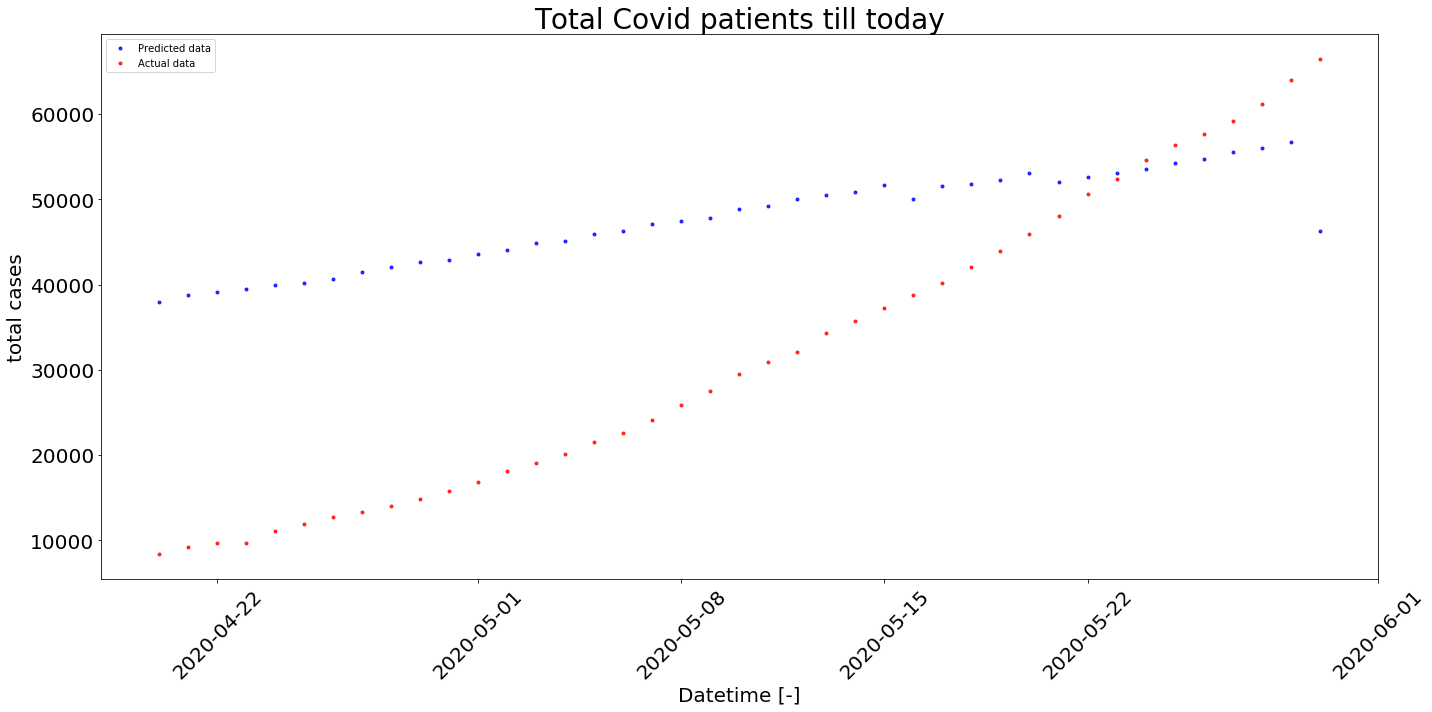

In [147]:
# Plotting the target: Total cases

plt.figure(figsize=(20,10))

plt.plot(pak_indices_dates, pak_y_pred, '.', color='blue', label='Predicted data', alpha=0.8)
plt.plot(pak_indices_dates, pak_y_test, '.', color='red', label='Actual data', alpha=0.8)
plt.legend()
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'total cases', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('Total Covid patients till today', fontsize=28)

plt.tight_layout()


## Deep Neural Network